In [1]:
import pandas as pd
import configparser
import matplotlib.pyplot as plt
%matplotlib inline

from Wrapper import *
from Influx_Dataframe_Client import Influx_Dataframe_Client

# Data Sources

## XBOS

In [2]:
# xbos_obj = Import_XBOS()
# xbos_obj.get_weather_power_tstat('ciee', '2018-08-01T00:00:00Z', '2018-08-30T00:00:00Z', 
#                                         data_type=['power', 'temperature'])
# imported_data = xbos_obj.data
# imported_data.head()

In [3]:
# main_obj = Wrapper()

# cleaned_data = main_obj.clean_data(imported_data, high_bound=9998,
#                                 rename_col=['1', '2', '3', '4', '5'],
#                                 drop_col='1',
#                                 save_file=False)

# preprocessed_data = main_obj.preprocess_data(cleaned_data, week=True, tod=True, 
#                                             standardize=True,
#                                             save_file=False)

# main_obj.model(preprocessed_data, dep_col='5', alphas=np.logspace(-4,1,5), figsize=(18,5),
#                 cv=5,
#                 baseline_period=["2018-08-01","2018-08-15"], 
#                 projection_period=["2018-08-16","2018-08-30"])

# main_obj.write_json()

## CSV

In [4]:
# main_obj = Wrapper()
# main_obj.read_json(file_name='input.json')
# main_obj.search(file_name='input.json')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


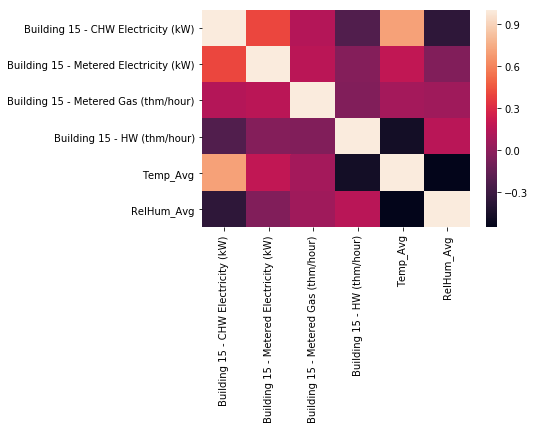

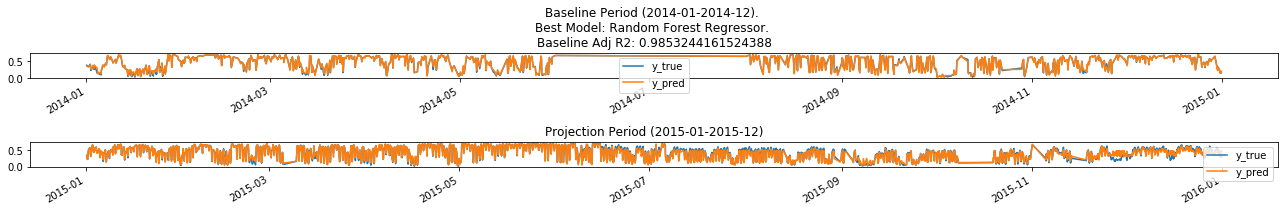

In [5]:
def func(X, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    model = LinearRegression()
    model.fit(X, y)
    return model.predict(X)

main_obj = Wrapper()

imported_data = main_obj.import_data(folder_name='../data/', head_row=[5,5,0], 
                                     save_file=False)

cleaned_data = main_obj.clean_data(imported_data, high_bound=9998,
                                rename_col=['OAT','RelHum_Avg', 'CHW_Elec', 'Elec', 'Gas', 'HW_Heat'],
                                drop_col='Elec',
                                save_file=False)

preprocessed_data = main_obj.preprocess_data(cleaned_data, week=True, tod=True, 
                                            normalize=True,
                                            save_file=False)

main_obj.model(preprocessed_data, dep_col='HW_Heat', alphas=np.logspace(-4,1,5), figsize=(18,5),
                cv=5,
                baseline_period=["2014-01","2014-12"], 
                projection_period=["2015-01","2015-12", "2016-01","2016-12"],
#                project_ind_col=['OAT'],
                exclude_time_period=[],
                custom_model_func=func)

main_obj.write_json()

## InfluxDB

In [6]:
# database = 'pyTestDB' # Change this in config file!
# measurement = 'SkySpark_Power'
# tags_list = ['Building_Number']
# values_list = ['30_1']
# client = Influx_Dataframe_Client('./influx_config.yaml')

# query1 = client.specific_query(database, measurement, tags=tags_list, values=values_list,
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')
# query2 = client.specific_query(database, measurement='Outdoor_Air_Temperature',
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')

In [7]:
# df = query1.copy()
# df = df.join(query2, how='outer')
# df.plot()

In [8]:
# main_obj = Wrapper()

# cleaned_data = main_obj.clean_data(df, rename_col=['Power', 'OAT'])

# preprocessed_data = main_obj.preprocess_data(cleaned_data, col_degree=['OAT'], degree=[2], 
#                                               month=True, week=True)

# main_obj.model(preprocessed_data, dep_col='Power', baseline_period=["2017-08", "2018-04"],
#                projection_period=["2018-05", "2018-07"],
#                alphas=np.logspace(-4,1,5))
# main_obj.write_json()